In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.preprocessing import Imputer,StandardScaler,Normalizer
from sklearn.ensemble import RandomForestRegressor

C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [157]:
data=pd.read_csv("train.csv")
vish=data[:100000]
visl=data[:1000]
data=data[:100000]

In [158]:

#24 columns and 341424 rows
data.info()
#14 numerical & 9 categorical
#target numerical(regression)
data.isnull().sum()
#Null values==season_holidayed_code>> 114 & state_code_residence 4764
data.iloc[:,9:].describe(include="all")
#reservation_id > all unique no need*
data=data.drop(["reservation_id","booking_date"],axis=1)
#checking date and checkout date > can be used to do feature engineering  
#channel_code > range(1-3)
#main_product_code > range(1-3)
#no. of adults > 1-32
#children > 1-13
#id > 45-4995
#resort region > 1-3
#resort type > 1-7
#room type > 1-6
#nights > -45 - 60 (minus seems to be fishy)*
#season > 1-38
#starcode residence 1-38
#starcode resort > 1-13
#total_pax > 1-24
#member age > categorical (D is predominant)
#member id > one third is unique 
#cluster code > categorical(6 unique)
#reservation status code > categorical (4 unique)
#"" id > 32 unique one
#amount[TARGET] > 1- 10.8 amount

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
reservation_id                        100000 non-null object
booking_date                          100000 non-null object
checkin_date                          100000 non-null object
checkout_date                         100000 non-null object
channel_code                          100000 non-null int64
main_product_code                     100000 non-null int64
numberofadults                        100000 non-null int64
numberofchildren                      100000 non-null int64
persontravellingid                    100000 non-null int64
resort_region_code                    100000 non-null int64
resort_type_code                      100000 non-null int64
room_type_booked_code                 100000 non-null int64
roomnights                            100000 non-null int64
season_holidayed_code                 99977 non-null float64
state_code_residence                  98987 n

In [159]:
x_data.head(10)

,channel_code,main_product_code,numberofadults,numberofchildren,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,total_pax,...,member_age_buckets_I,member_age_buckets_J,cluster_code_B,cluster_code_C,cluster_code_D,cluster_code_E,cluster_code_F,reservationstatusid_code_B,reservationstatusid_code_C,reservationstatusid_code_D
0,3,1,2,0,3,3,3,1,2.0,3,...,0,0,0,0,0,0,1,0,1,0
1,1,1,2,0,3,3,4,5,2.0,2,...,0,0,0,0,0,0,1,0,0,0
2,1,1,2,0,1,5,4,4,2.0,2,...,0,0,0,0,0,1,0,0,0,0
3,1,1,2,2,2,2,3,5,2.0,2,...,0,0,0,0,1,0,0,0,0,0
4,1,1,2,0,2,2,4,5,2.0,2,...,0,0,0,0,1,0,0,0,0,0
5,1,1,2,0,1,1,4,2,2.0,2,...,0,0,0,0,0,0,1,0,0,0
6,3,1,2,0,2,7,4,1,3.0,1,...,0,0,1,0,0,0,0,0,0,0
7,1,1,2,2,1,1,2,5,3.0,4,...,0,0,0,0,0,0,1,0,0,0
8,1,1,2,0,2,4,3,6,4.0,2,...,0,0,1,0,0,0,0,0,0,0
9,1,1,2,0,1,5,4,4,3.0,2,...,0,0,0,0,0,1,0,0,0,0


In [160]:
data["checkin_date"]=pd.to_datetime(data["checkin_date"],dayfirst=True)
data["checkout_date"]=pd.to_datetime(data["checkout_date"],dayfirst=True)
r=data["checkout_date"]-data["checkin_date"]
data["overall_days"]=r.dt.days
y_data=data["amount_spent_per_room_night_scaled"]

In [161]:
l=["checkin_date","checkout_date","memberid","amount_spent_per_room_night_scaled","state_code_residence","state_code_resort","resort_id"]
x_data=data.drop(l,axis=1)

In [162]:
x_data=x_data.drop("reservationstatusid_code",axis=1)

In [163]:
r_data=x_data.copy()
#r_data["amount_spent_per_room_night_scaled"]=y_data
r_data[:10]

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,total_pax,member_age_buckets,booking_type_code,cluster_code,overall_days
0,3,1,2,0,46,3,3,3,1,2.0,3,F,1,F,1
1,1,1,2,0,46,3,3,4,5,2.0,2,F,1,F,5
2,1,1,2,0,47,1,5,4,4,2.0,2,F,1,E,4
3,1,1,2,2,46,2,2,3,5,2.0,2,F,1,D,5
4,1,1,2,0,46,2,2,4,5,2.0,2,F,1,D,5
5,1,1,2,0,47,1,1,4,2,2.0,2,F,1,F,1
6,3,1,2,0,46,2,7,4,1,3.0,1,F,1,B,1
7,1,1,2,2,46,1,1,2,5,3.0,4,F,1,F,5
8,1,1,2,0,45,2,4,3,6,4.0,2,F,1,B,6
9,1,1,2,0,45,1,5,4,4,3.0,2,F,1,E,3


In [164]:
x_data=pd.get_dummies(x_data,columns=["persontravellingid","member_age_buckets","cluster_code"],drop_first=True)

In [165]:
imp = Imputer(missing_values=np.NaN,strategy='most_frequent')
x_data["season_holidayed_code"]=imp.fit_transform(x_data["season_holidayed_code"].values.reshape(-1, 1))

In [166]:
x_data.isnull().sum()

channel_code               0
main_product_code          0
numberofadults             0
numberofchildren           0
resort_region_code         0
resort_type_code           0
room_type_booked_code      0
roomnights                 0
season_holidayed_code      0
total_pax                  0
booking_type_code          0
overall_days               0
persontravellingid_46      0
persontravellingid_47      0
persontravellingid_4752    0
persontravellingid_4753    0
member_age_buckets_B       0
member_age_buckets_C       0
member_age_buckets_D       0
member_age_buckets_E       0
member_age_buckets_F       0
member_age_buckets_G       0
member_age_buckets_H       0
member_age_buckets_I       0
member_age_buckets_J       0
cluster_code_B             0
cluster_code_C             0
cluster_code_D             0
cluster_code_E             0
cluster_code_F             0
dtype: int64

3     8878
2     6769
4     5268
6     3479
1     1638
5     1124
8     1116
9      525
12     352
10     277
7      259
15      79
16      57
14      46
18      37
20      30
11      23
13      10
24       9
21       6
37       5
27       4
25       3
17       3
26       1
34       1
22       1
Name: roomnights, dtype: int64


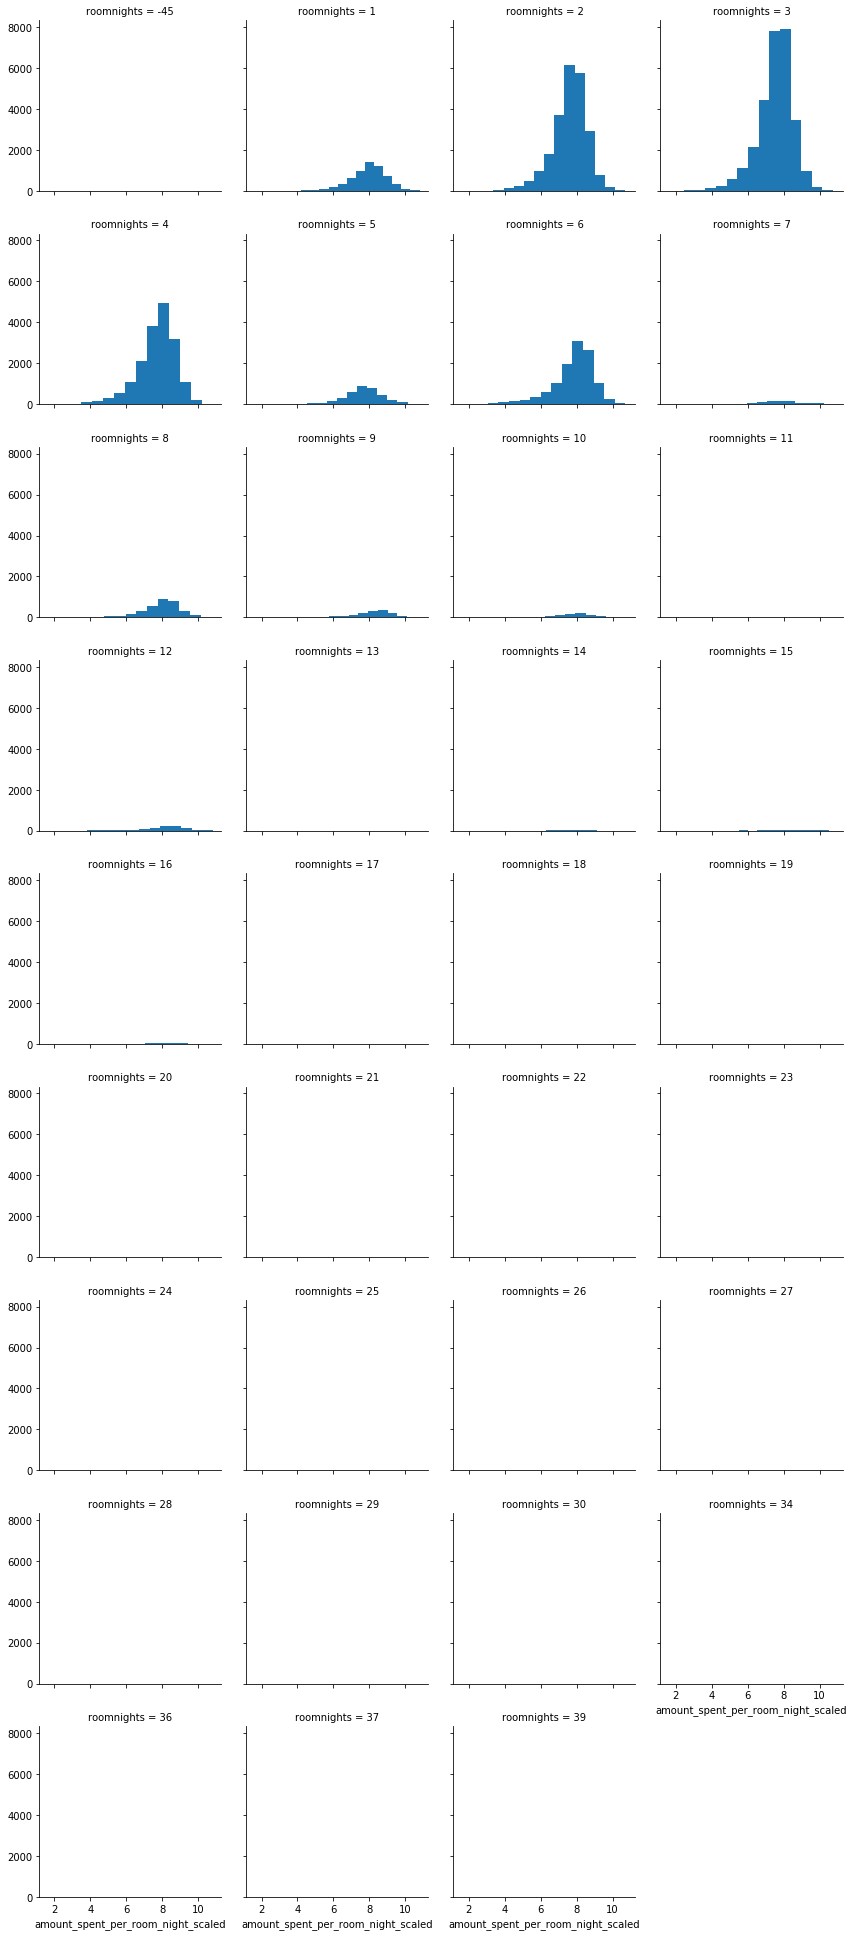

In [23]:
# #print(data["channel_code"].value_counts())
# g=sns.FacetGrid(vish,col="channel_code")
# g.map(plt.hist,"amount_spent_per_room_night_scaled",bins=15)
# # #channel plays an important role 1>3>2*

# #data["main_product_code"].value_counts()
# g1=sns.FacetGrid(vish,col="main_product_code")
# g1.map(plt.hist,"amount_spent_per_room_night_scaled",bins=15)
# #product code 7 has high amount spend

# #data["numberofadults"].value_counts()
# g2=sns.FacetGrid(vish,col="numberofadults",col_wrap=4)
# g2.map(plt.hist,"amount_spent_per_room_night_scaled",bins=15)

print(x_data["roomnights"].value_counts())
g2=sns.FacetGrid(vish,col="roomnights",col_wrap=4)
g2.map(plt.hist,"amount_spent_per_room_night_scaled",bins=15)



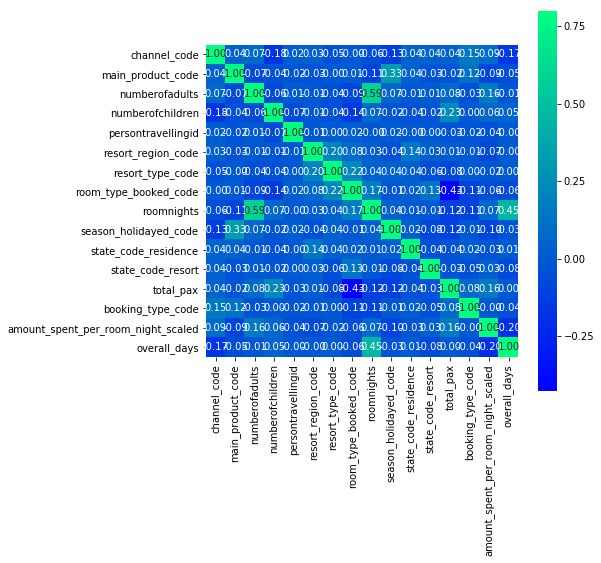

In [13]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,fmt=".2f",cmap="winter")

In [167]:
x_data.iloc[:10,10:]

,booking_type_code,overall_days,persontravellingid_46,persontravellingid_47,persontravellingid_4752,persontravellingid_4753,member_age_buckets_B,member_age_buckets_C,member_age_buckets_D,member_age_buckets_E,member_age_buckets_F,member_age_buckets_G,member_age_buckets_H,member_age_buckets_I,member_age_buckets_J,cluster_code_B,cluster_code_C,cluster_code_D,cluster_code_E,cluster_code_F
0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1,4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
5,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
6,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
7,1,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
8,1,6,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
9,1,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [169]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
col=["channel_code","resort_region_code","resort_type_code","room_type_booked_code","season_holidayed_code"]
x_data[col]=pd.DataFrame(scaler.fit_transform(x_data[col]))

In [170]:
x_data

,channel_code,main_product_code,numberofadults,numberofchildren,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,total_pax,...,member_age_buckets_F,member_age_buckets_G,member_age_buckets_H,member_age_buckets_I,member_age_buckets_J,cluster_code_B,cluster_code_C,cluster_code_D,cluster_code_E,cluster_code_F
0,0.474342,1,2,0,0.474342,0.474342,0.474342,1,0.316228,3,...,1,0,0,0,0,0,0,0,0,1
1,0.160128,1,2,0,0.480384,0.480384,0.640513,5,0.320256,2,...,1,0,0,0,0,0,0,0,0,1
2,0.145865,1,2,0,0.145865,0.729325,0.583460,4,0.291730,2,...,1,0,0,0,0,0,0,0,1,0
3,0.213201,1,2,2,0.426401,0.426401,0.639602,5,0.426401,2,...,1,0,0,0,0,0,0,1,0,0
4,0.185695,1,2,0,0.371391,0.371391,0.742781,5,0.371391,2,...,1,0,0,0,0,0,0,1,0,0
5,0.208514,1,2,0,0.208514,0.208514,0.834058,2,0.417029,2,...,1,0,0,0,0,0,0,0,0,1
6,0.321634,1,2,0,0.214423,0.750479,0.428845,1,0.321634,1,...,1,0,0,0,0,1,0,0,0,0
7,0.250000,1,2,2,0.250000,0.250000,0.500000,5,0.750000,4,...,1,0,0,0,0,0,0,0,0,1
8,0.147442,1,2,0,0.294884,0.589768,0.442326,6,0.589768,2,...,1,0,0,0,0,1,0,0,0,0
9,0.138675,1,2,0,0.138675,0.693375,0.554700,4,0.416025,2,...,1,0,0,0,0,0,0,0,1,0


In [171]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=0)


In [33]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100,n_jobs=-1)
random_forest.fit(x_train, y_train)

y_predict = random_forest.predict(x_test)


In [41]:
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors =10,n_jobs=-1)
model.fit(x_train, y_train)
print(model.score(x_train,y_train))

y_predict = model.predict(x_test)

0.24896526911002415


In [13]:
# from sklearn.svm import SVR
# SVM_model=SVR(kernel='linear',C=1)
# SVM_model.fit(x_train,y_train)
# SVM_model.score(x_train,y_train)
# y_predict = SVM_model.predict(x_test)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [172]:
from sklearn.linear_model import Ridge
lasso_model=Ridge(alpha=1)
lasso_model.fit(x_train,y_train)

y_predict = lasso_model.predict(x_test)

In [173]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_predict,y_test)

import math
rmse=math.sqrt(mse)
rmse

0.9882789661238485

In [80]:
y_test.head(10)

3582     7.598058
60498    8.587581
53227    8.813833
21333    8.386433
3885     7.490172
51521    7.607910
84261    5.700887
10685    7.989878
59948    6.820675
41032    7.526858
Name: amount_spent_per_room_night_scaled, dtype: float64

In [81]:
y_predict[:10]

array([7.73324489, 7.54429453, 8.12248182, 7.84122285, 7.37705896,
       7.84639091, 7.27501689, 7.31661448, 7.11164354, 6.90284054])

In [94]:
test=pd.read_csv("test.csv")
y_predict = model.predict(test)

ValueError: shapes (20000,33) and (34,) not aligned: 33 (dim 1) != 34 (dim 0)

In [92]:
t=pd.read_csv("sample_submission.csv")

a3693895acc1d2d9b7427946e36eb79647800060569c6a157aa9014cf14adf75    1
dd6ecfec53c1e50beaf70c09ac638bc723c5e0151cab02bd651b5186d4ebf305    1
1d30244f950c31832ba27950d65cf57fd9c370cf2c3f14619710b5ac6c6ea934    1
6b00fc283d5c37ce352e04ca45dc1ba6bf1849ee9015d6bf3573882f5015ee57    1
021c15d4c1d2dc2ca07df8343530de18b690d139342ea4f46e9eccd58f34665b    1
cc5613d492b938472691a055c22cf9b225fa69a3b0905bdbf8c64223c6c33c18    1
72ecc83a748bca4edec8167bd7bc1cce5d4b1de7a83bab97aacc4d79fe6b0aac    1
14735d9a83c127a7371d7f55f94aa393c1915a1bd23123c6d1e982bbb7cb2f9c    1
dcea375c25821382260256cd4f6b17a3a829c35ac201b7a009b185c1fba07545    1
03612b8e24bbb49519eda820cdf2f7e13366d6bb42d5ee45c41cc1b077bde441    1
a7db27e679e516a88216de66237e9cdda6d883dc8dc49e894a5c6c498cff4368    1
fec41cc85843de1d4e0100a01ef05e865cd42aa78a50cf00c39fc1c8df896a8d    1
e027258768d46ad9732007cc5f2530f5f52029a9c6c97c1bd557a234a109f80f    1
c6eb488f96aae653e73756e3dd9a9c704bd8119f40f8fc8a33f5829c098bcad5    1
1e688d6ab15287abf2b2